<a href="https://colab.research.google.com/github/nic-fp/Facebook-Data-Challenge/blob/main/Facebook_Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Facebook Data Challenge/netflix_titles_cleaned.csv")
imdb_ratings = pd.read_csv("/content/gdrive/MyDrive/Facebook Data Challenge/titles and ratings.csv")
#data['dif_yearAdded_yearReleased'] =  data.date_added.dt.year - data['release_year'] 
data = pd.merge(data,imdb_ratings,on='title',how='left')
data = data[data['country'].notna()]
data['date_added'] = pd.to_datetime(data['date_added'])
data['dif_yearAdded_yearReleased'] =  data.date_added.dt.year - data['release_year']
DATA_TV = data[data['type'] == 'TV Show']
DATA_MOVIE = data[data['type'] == 'Movie']
DATA_MOVIE_US = DATA_MOVIE[DATA_MOVIE['country'] == 'United States']
DATA_TV_US = DATA_TV[DATA_TV['country'] == 'United States']
data_us = data[data["country"] == 'United States']
COLORS = ['seagreen','firebrick', 'salmon', 'darkorange', 'goldenrod', 'gold', 'olive','lawngreen','turquoise','darkslategray','teal','dodgerblue','navy','blueviolet', 'violet','purple','fuchsia','mediumvioletred']

In [ ]:
print(len(DATA_TV))
print(len(DATA_MOVIE))
print(len(data))
data.head(2)
 

2150
5231
7381


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Seasons Ran,Length_in_Minutes,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Dramas,International Movies,Horror Movies,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,TV Mysteries,Thrillers,Crime TV Shows,Docuseries,Documentaries,Sports Movies,Comedies,Anime Series,Reality TV,TV Comedies,Romantic Movies,Romantic TV Shows,Science & Nature TV,Movies,British TV Shows,Korean TV Shows,Music & Musicals,LGBTQ Movies,Faith & Spirituality,Kids' TV,TV Action & Adventure,Spanish-Language TV Shows,Children & Family Movies,TV Shows,Classic Movies,Cult Movies,TV Horror,Stand-Up Comedy & Talk Shows,Teen TV Shows,Stand-Up Comedy,Anime Features,TV Thrillers,Classic & Cult TV,imdb_rating,dif_yearAdded_yearReleased
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN,93.0,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,0.0


In [ ]:
df =data.date_added.dt.year
df = data['country']
df.value_counts()



United States                                                  2608
India                                                           929
United Kingdom                                                  404
Japan                                                           230
South Korea                                                     185
                                                               ... 
United Arab Emirates, United States, United Kingdom               1
Chile, Italy                                                      1
Italy, United Kingdom, France                                     1
South Korea, Czech Republic                                       1
Italy, South Africa, West Germany, Australia, United States       1
Name: country, Length: 681, dtype: int64

In [ ]:
!pip install pandasql
import pandasql as psql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26782 sha256=32591f32359eb90529cb510554f4237557bd6dc30aea9f3345ed525233999acb
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
avgLength =  psql.sqldf("SELECT avg(Length_in_Minutes) FROM data WHERE data.type = 'Movie'")
print('Total', avgLength)
avgLengthUS =  psql.sqldf("SELECT avg(Length_in_Minutes) FROM DATA_MOVIE_US  WHERE DATA_MOVIE_US.type = 'Movie'")
print('US', avgLengthUS)


Total    avg(Length_in_Minutes)
0              100.285223
US    avg(Length_in_Minutes)
0               89.783641


In [ ]:
avgNumSeasons = psql.sqldf("SELECT avg(`Seasons Ran`) FROM data WHERE data.type = 'TV Show' ")
print('Total',avgNumSeasons)

avgNumSeasonsUS = psql.sqldf("SELECT avg(`Seasons Ran`) FROM DATA_TV_US WHERE DATA_TV_US.type = 'TV Show' ")
print('US',avgNumSeasonsUS)

Total    avg(`Seasons Ran`)
0            1.854419
US    avg(`Seasons Ran`)
0            2.342216


In [ ]:
breakdownOfCountryinData = psql.sqldf("SELECT country, COUNT(*) FROM data GROUP BY country ORDER BY COUNT(*) DESC LIMIT(5)")
print(breakdownOfCountryinData)

          country  COUNT(*)
0   United States      2608
1           India       929
2  United Kingdom       404
3           Japan       230
4     South Korea       185


In [ ]:
all = psql.sqldf("SELECT COUNT(*) FROM data")
print(all)

   COUNT(*)
0      7381


In [ ]:
top_3_countries = ['United States', 'India', 'United Kingdom']
list_of_years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
list_of_months = [1,2,3,4,5,6,7,8,9,10,11,12]
list_of_genres = ['Children & Family Movies', 'Independent Movies', 'International Movies', 'TV Horror', 'Crime TV Shows', 'Dramas', 'Stand-Up Comedy & Talk Shows', 'Stand-Up Comedy', 'Science & Nature TV', 'Thrillers', 'Horror Movies', 'Docuseries', 'TV Sci-Fi & Fantasy', 'Music & Musicals', 'Sports Movies', 'TV Dramas', 'Action & Adventure', 'Classic Movies', 'Anime Features', 'Romantic Movies', 'Reality TV', 'Cult Movies', 'TV Shows', 'TV Action & Adventure', 'Korean TV Shows', 'Sci-Fi & Fantasy', 'British TV Shows', 'Comedies', 'Faith & Spirituality', 'Romantic TV Shows', 'LGBTQ Movies', 'TV Mysteries', 'Documentaries', 'Classic & Cult TV', "Kids' TV", 'Teen TV Shows', 'International TV Shows', 'Movies', 'TV Thrillers', 'TV Comedies', 'Spanish-Language TV Shows', 'Anime Series']

In [ ]:
#Overall genre makeup with all countries (including None)
numDataPoints = len(data)
percent = {}
for i in list_of_genres:
  try:
    temp = data.loc[data[i] == True]
    percent[i] = len(temp) / len(data)
  except:
    print(i, ': Not in Subset')

dataFrame = pd.DataFrame.from_dict(percent, orient='index')
#dataFrame.sort_values(by= ['0'],axis = 'columns')
#dataFrame.plot()
dataFrame

,0
Children & Family Movies,0.066929
Independent Movies,0.092128
International Movies,0.319062
TV Horror,0.009619
Crime TV Shows,0.054193
Dramas,0.283159
Stand-Up Comedy & Talk Shows,0.006097
Stand-Up Comedy,0.040780
Science & Nature TV,0.010839
Thrillers,0.066793


In [ ]:
data['listed_in'].value_counts()

Documentaries                                            325
Dramas, International Movies                             308
Stand-Up Comedy                                          294
Comedies, Dramas, International Movies                   241
Dramas, Independent Movies, International Movies         213
                                                        ... 
Kids' TV, TV Dramas, Teen TV Shows                         1
Action & Adventure, Classic Movies, Sci-Fi & Fantasy       1
Kids' TV, TV Comedies, TV Sci-Fi & Fantasy                 1
TV Action & Adventure, TV Horror, TV Sci-Fi & Fantasy      1
International Movies                                       1
Name: listed_in, Length: 484, dtype: int64

In [ ]:
DATA_MOVIE['listed_in'].value_counts()


Documentaries                                               325
Dramas, International Movies                                308
Stand-Up Comedy                                             294
Comedies, Dramas, International Movies                      241
Dramas, Independent Movies, International Movies            213
                                                           ... 
Sci-Fi & Fantasy                                              1
Action & Adventure, Sci-Fi & Fantasy, Sports Movies           1
Children & Family Movies, Comedies, Faith & Spirituality      1
Horror Movies, LGBTQ Movies, Music & Musicals                 1
LGBTQ Movies, Thrillers                                       1
Name: listed_in, Length: 264, dtype: int64

In [ ]:
DATA_MOVIE_US['listed_in'].value_counts()


Documentaries                                      233
Stand-Up Comedy                                    207
Children & Family Movies, Comedies                  82
Dramas                                              79
Children & Family Movies                            79
                                                  ... 
Comedies, Dramas, Sports Movies                      1
Children & Family Movies, Comedies, Cult Movies      1
Comedies, Dramas, Music & Musicals                   1
Comedies, Cult Movies, Sports Movies                 1
Classic Movies, Dramas, Romantic Movies              1
Name: listed_in, Length: 166, dtype: int64

In [ ]:
DATA_TV['listed_in'].value_counts()


Kids' TV                                                  166
Crime TV Shows, International TV Shows, TV Dramas          97
Kids' TV, TV Comedies                                      79
International TV Shows, TV Dramas                          78
Anime Series, International TV Shows                       76
                                                         ... 
Reality TV, Science & Nature TV                             1
TV Horror, Teen TV Shows                                    1
Docuseries, Science & Nature TV, TV Action & Adventure      1
TV Comedies, TV Horror, TV Thrillers                        1
Classic & Cult TV, TV Horror, TV Mysteries                  1
Name: listed_in, Length: 220, dtype: int64

In [ ]:
DATA_TV_US['listed_in'].value_counts()

Kids' TV                                        69
Reality TV                                      64
Docuseries                                      59
TV Comedies                                     55
Kids' TV, TV Comedies                           38
                                                ..
British TV Shows, Docuseries                     1
TV Comedies, TV Dramas, TV Mysteries             1
Docuseries, Science & Nature TV, TV Comedies     1
TV Action & Adventure                            1
International TV Shows, TV Dramas, TV Horror     1
Name: listed_in, Length: 128, dtype: int64

In [ ]:
#d = DATA_MOVIE[DATA_MOVIE.date_added.dt.year.eq(2016)]# or DATA_MOVIE.date_added.dt.year.eq(2017) or DATA_MOVIE.date_added.dt.year.eq(2018) or DATA_MOVIE.date_added.dt.year.eq(2019) or DATA_MOVIE.date_added.dt.year.eq(2020)]

mask = ((DATA_MOVIE.date_added.dt.year >= 2016) & (DATA_MOVIE.date_added.dt.year <= 2020))
DATA_MOVIE = DATA_MOVIE.loc[mask]

Children & Family Movies : Not in year: 2021


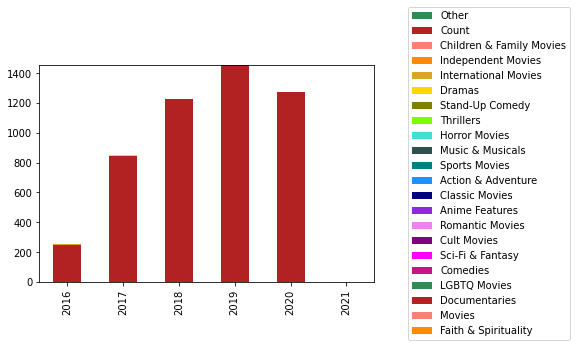

,2016,2017,2018,2019,2020,2021
Other,0.00,0.00,0.00,0.00,0.00,0.0
Count,251.00,847.00,1221.00,1455.00,1273.00,0.0
Children & Family Movies,0.08,0.08,0.06,0.09,0.12,NaN
Independent Movies,0.13,0.14,0.13,0.14,0.11,NaN
International Movies,0.34,0.48,0.55,0.42,0.43,NaN
Dramas,0.27,0.35,0.43,0.41,0.42,NaN
Stand-Up Comedy,0.13,0.07,0.07,0.04,0.03,NaN
Thrillers,0.06,0.08,0.10,0.10,0.10,NaN
Horror Movies,0.03,0.04,0.06,0.07,0.06,NaN
Music & Musicals,0.05,0.06,0.07,0.05,0.05,NaN


In [ ]:
#data.loc[data.date_added.dt.year.eq(2016)]
list_of_years = [2016,2017,2018,2019,2020,2021]
#Overall genre makeup movies with all countries by Year
percent_year = {}
for year in list_of_years:
  try:
    temp_df = DATA_MOVIE.loc[DATA_MOVIE.date_added.dt.year.eq(year)]
    temp_len = len(temp_df)
    percent_year[year] = {}
    percent_year[year]['Other'] = 0
    percent_year[year]['Count'] = temp_len #DELETE WHEN PLOTTING. If you keep it will show how count of movies has grown every year
    try:
      for genre in list_of_genres:
        temp = temp_df.loc[temp_df[genre] == True]
        value = round((len(temp) / temp_len),2)
        if value >= .001:
          percent_year[year][genre]= value
        #else:
        #  percent_year[year]['Other'] += value
    except:
      print(genre, ': Not in year:', year) 
  except:
    print(year,': Not in Subset')
df = pd.DataFrame(percent_year)

df.transpose().plot(kind="bar", stacked=True, color = COLORS)
plt.legend(bbox_to_anchor=(1.6, .5), loc='right')
plt.show()
df

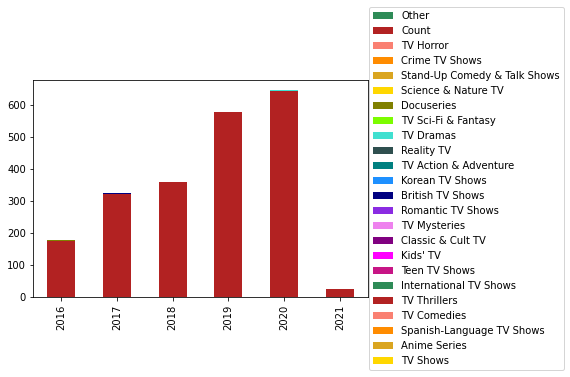

,2016,2017,2018,2019,2020,2021
Other,0.00,0.00,0.00,0.00,0.00,0.00
Count,176.00,322.00,358.00,576.00,644.00,24.00
TV Horror,0.03,0.01,0.03,0.04,0.04,NaN
Crime TV Shows,0.15,0.19,0.23,0.19,0.18,0.12
Stand-Up Comedy & Talk Shows,0.01,0.03,0.04,0.01,0.01,0.04
Science & Nature TV,0.06,0.06,0.02,0.04,0.02,0.04
Docuseries,0.15,0.17,0.15,0.15,0.13,0.25
TV Sci-Fi & Fantasy,0.02,0.03,0.03,0.03,0.05,0.12
TV Dramas,0.26,0.34,0.27,0.29,0.29,0.21
Reality TV,0.03,0.04,0.09,0.10,0.12,0.12


In [ ]:
#ALL COUNTRIES TV GENRE MAKEUP BY YEAR
percent_year = {}
list_of_years = [2016,2017,2018,2019,2020,2021]
for year in list_of_years:
  try:
    temp_df = DATA_TV.loc[DATA_TV.date_added.dt.year.eq(year)]
    temp_len = len(temp_df)
    percent_year[year] = {}
    percent_year[year]['Other'] = 0
    percent_year[year]['Count'] = temp_len
    try:
      for genre in list_of_genres:
        temp = temp_df.loc[temp_df[genre] == True]
        value = round((len(temp) / temp_len),2)
        if value >= .01:
          percent_year[year][genre]= value
        else:
          percent_year[year]['Other'] += value
    except:
      print(genre, ': Not in year:', year) 
  except:
    print(year,': Not in Subset')
df = pd.DataFrame(percent_year)

df.transpose().plot(kind="bar", stacked=True,color = COLORS)
plt.legend(bbox_to_anchor=(1.6, .5), loc='right')
plt.show()
df

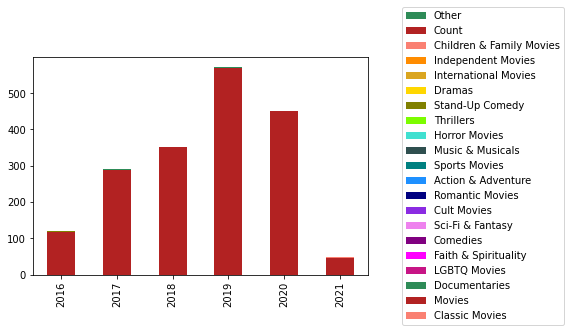

,2016,2017,2018,2019,2020,2021
Other,0.00,0.00,0.00,0.00,0.00,0.00
Count,118.00,288.00,351.00,569.00,450.00,45.00
Children & Family Movies,0.10,0.11,0.12,0.15,0.16,0.18
Independent Movies,0.14,0.20,0.18,0.12,0.16,0.16
International Movies,0.01,0.02,0.01,0.01,NaN,NaN
Dramas,0.18,0.23,0.25,0.28,0.35,0.42
Stand-Up Comedy,0.22,0.15,0.14,0.08,0.06,0.02
Thrillers,0.08,0.07,0.10,0.10,0.10,0.07
Horror Movies,0.03,0.06,0.08,0.07,0.08,NaN
Music & Musicals,0.09,0.04,0.07,0.05,0.05,NaN


In [ ]:
percent_year = {}
for year in list_of_years:
  try:
    temp_df = DATA_MOVIE_US.loc[DATA_MOVIE_US.date_added.dt.year.eq(year)]
    temp_len = len(temp_df)
    percent_year[year] = {}
    percent_year[year]['Other'] = 0
    percent_year[year]['Count'] = temp_len
    try:
      for genre in list_of_genres:
        temp = temp_df.loc[temp_df[genre] == True]
        value = round((len(temp) / temp_len),2)
        if value >= .0010:
          percent_year[year][genre]= value
        else:
          percent_year[year]['Other'] += value
    except:
      print(genre, ': Not in year:', year) 
  except:
    print(year,': Not in Subset')
df = pd.DataFrame(percent_year)

df.transpose().plot(kind="bar", stacked=True,color = COLORS)
plt.legend(bbox_to_anchor=(1.6, .5), loc='right')
plt.show()
df

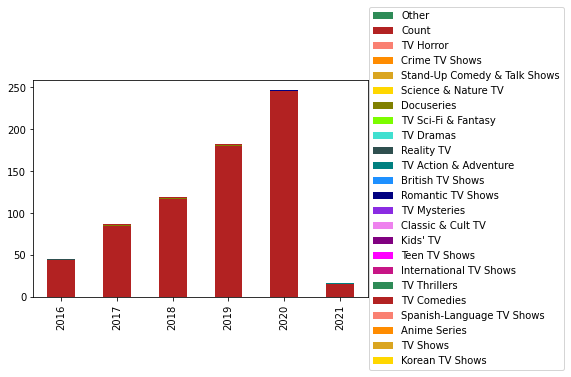

,2016,2017,2018,2019,2020,2021
Other,0.00,0.00,0.00,0.00,0.00,0.00
Count,44.00,85.00,117.00,180.00,245.00,15.00
TV Horror,0.02,NaN,0.03,0.08,0.04,NaN
Crime TV Shows,0.14,0.13,0.21,0.17,0.13,0.13
Stand-Up Comedy & Talk Shows,0.02,0.07,0.11,0.03,0.02,0.07
Science & Nature TV,0.07,0.04,0.02,0.09,0.05,0.07
Docuseries,0.18,0.22,0.26,0.26,0.22,0.33
TV Sci-Fi & Fantasy,0.02,0.08,0.03,0.06,0.07,0.13
TV Dramas,0.25,0.28,0.20,0.28,0.25,0.13
Reality TV,0.07,0.06,0.17,0.13,0.20,0.13


In [ ]:
percent_year = {}
for year in list_of_years:
  try:
    temp_df = DATA_TV_US.loc[DATA_TV_US.date_added.dt.year.eq(year)]
    temp_len = len(temp_df)
    percent_year[year] = {}
    percent_year[year]['Other'] = 0
    percent_year[year]['Count'] = temp_len
    try:
      for genre in list_of_genres:
        temp = temp_df.loc[temp_df[genre] == True]
        value = round((len(temp) / temp_len),2)
        if value >= .0010:
          percent_year[year][genre]= value
        else:
          percent_year[year]['Other'] += value
    except:
      print(genre, ': Not in year:', year) 
  except:
    print(year,': Not in Subset')
df = pd.DataFrame(percent_year)

df.transpose().plot(kind="bar", stacked=True, color = COLORS)
plt.legend(bbox_to_anchor=(1.6, .5), loc='right')
plt.show()
df

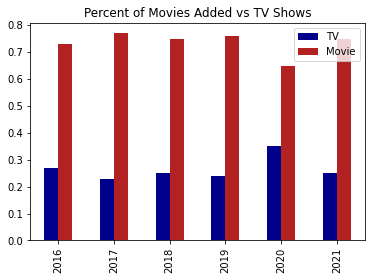

,2016,2017,2018,2019,2020,2021
TV,0.27,0.23,0.25,0.24,0.35,0.25
Movie,0.73,0.77,0.75,0.76,0.65,0.75


In [ ]:

percent_year = {}
for year in list_of_years:
  try:
    temp_df_tv = len(DATA_TV_US.loc[DATA_TV_US.date_added.dt.year.eq(year)])
    temp_df_movie = len(DATA_MOVIE_US.loc[DATA_MOVIE_US.date_added.dt.year.eq(year)])
    total_len = len(data_us.loc[data_us.date_added.dt.year.eq(year)])
    percent_year[year] = {}
    try:
      percent_year[year]['TV'] = round(temp_df_tv/total_len,2)
    except:
      percent_year[year]['TV'] = 0
    try:
      percent_year[year]['Movie'] = round(temp_df_movie/total_len,2)
    except:
      percent_year[year]['Movie'] = 0
  except:
    print('Error in:', year)
df = pd.DataFrame(percent_year)

df.transpose().plot(kind="bar", title = 'Percent of Movies Added vs TV Shows',stacked=False, color = ['darkblue', 'firebrick'])
plt.legend()
plt.show()
df

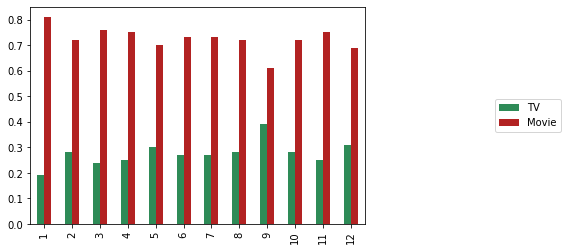

,1,2,3,4,5,6,7,8,9,10,11,12
TV,0.19,0.28,0.24,0.25,0.3,0.27,0.27,0.28,0.39,0.28,0.25,0.31
Movie,0.81,0.72,0.76,0.75,0.7,0.73,0.73,0.72,0.61,0.72,0.75,0.69


In [ ]:

percent_month = {}
for month in list_of_months:
  try:
    temp_df_tv = len(DATA_TV_US.loc[DATA_TV_US.date_added.dt.month.eq(month)])
    temp_df_movie = len(DATA_MOVIE_US.loc[DATA_MOVIE_US.date_added.dt.month.eq(month)])
    total_len = len(data_us.loc[data_us.date_added.dt.month.eq(month)])
    percent_month[month] = {}
    try:
      percent_month[month]['TV'] = round(temp_df_tv/total_len,2)
    except:
      percent_month[month]['TV'] = 0
    try:
      percent_month[month]['Movie'] = round(temp_df_movie/total_len,2)
    except:
      percent_month[month]['Movie'] = 0
  except:
    print('Error in:', month)
df = pd.DataFrame(percent_month)

df.transpose().plot(kind="bar", stacked=False, color = COLORS)
plt.legend(bbox_to_anchor=(1.6, .5), loc='right')
plt.show()
df

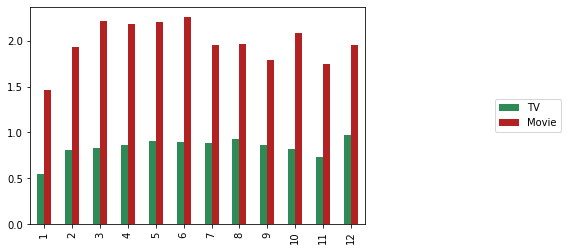

,1,2,3,4,5,6,7,8,9,10,11,12
TV,0.55,0.81,0.83,0.86,0.91,0.89,0.88,0.93,0.86,0.82,0.73,0.97
Movie,1.46,1.93,2.22,2.18,2.20,2.26,1.95,1.97,1.79,2.09,1.75,1.95


In [ ]:

percent_month = {}
for month in list_of_months:
  try:
    temp_df_tv = len(DATA_TV.loc[DATA_TV.date_added.dt.month.eq(month)])
    temp_df_movie = len(DATA_MOVIE.loc[DATA_MOVIE.date_added.dt.month.eq(month)])
    total_len = len(data_us.loc[data_us.date_added.dt.month.eq(month)])
    percent_month[month] = {}
    try:
      percent_month[month]['TV'] = round(temp_df_tv/total_len,2)
    except:
      percent_month[month]['TV'] = 0
    try:
      percent_month[month]['Movie'] = round(temp_df_movie/total_len,2)
    except:
      percent_month[month]['Movie'] = 0
  except:
    print('Error in:', month)
df = pd.DataFrame(percent_month)

df.transpose().plot(kind="bar", stacked=False, color = COLORS)
plt.legend(bbox_to_anchor=(1.6, .5), loc='right')
plt.show()
df

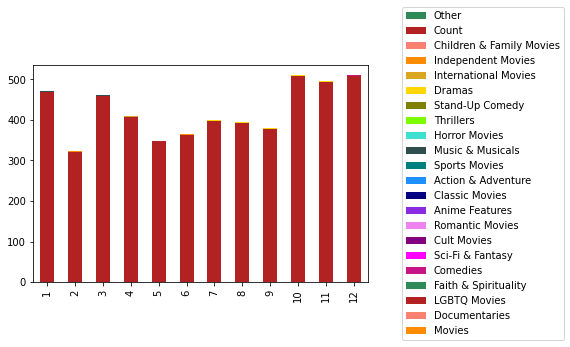

,1,2,3,4,5,6,7,8,9,10,11,12
Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Count,469.00,320.00,459.00,408.00,347.00,364.00,398.00,393.00,378.00,509.00,494.00,508.00
Children & Family Movies,0.13,0.09,0.09,0.08,0.06,0.09,0.07,0.07,0.08,0.09,0.13,0.09
Independent Movies,0.15,0.15,0.15,0.13,0.14,0.15,0.16,0.12,0.13,0.09,0.10,0.13
International Movies,0.33,0.46,0.50,0.48,0.52,0.51,0.44,0.46,0.50,0.49,0.39,0.46
Dramas,0.36,0.43,0.44,0.44,0.37,0.42,0.43,0.37,0.36,0.40,0.37,0.42
Stand-Up Comedy,0.06,0.05,0.05,0.05,0.06,0.05,0.06,0.06,0.04,0.04,0.06,0.07
Thrillers,0.10,0.10,0.08,0.09,0.10,0.10,0.11,0.10,0.11,0.09,0.09,0.09
Horror Movies,0.10,0.06,0.04,0.06,0.06,0.06,0.05,0.06,0.07,0.08,0.04,0.05
Music & Musicals,0.05,0.04,0.06,0.05,0.05,0.05,0.04,0.07,0.06,0.07,0.07,0.06


In [ ]:
percent_month = {}
for month in list_of_months:
  try:
    temp_df = DATA_MOVIE.loc[DATA_MOVIE.date_added.dt.month.eq(month)]
    
    
    temp_len = len(temp_df)
    percent_month[month] = {}
    percent_month[month]['Other'] = 0
    percent_month[month]["Count"] = temp_len
    try:
      for genre in list_of_genres:
        temp = temp_df.loc[temp_df[genre] == True]
        value = round((len(temp) / temp_len),2)
        if value >= .0010:
          percent_month[month][genre]= value
        else:
          percent_month[month]['Other'] += value
    except:
      print(genre, ': Not in month:', month) 
  except:
    print(month,': Not in Subset')
df = pd.DataFrame(percent_month)

df.transpose().plot(kind="bar", stacked=True, color = COLORS)
plt.legend(bbox_to_anchor=(1.6, .5), loc='right')
plt.show()

df

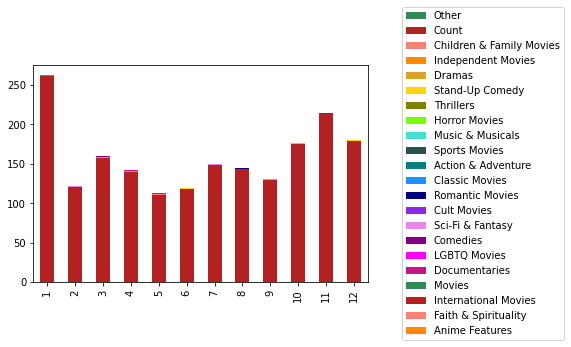

,1,2,3,4,5,6,7,8,9,10,11,12
Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Count,261.00,120.00,158.00,140.00,111.00,118.00,148.00,143.00,129.00,175.00,213.00,179.00
Children & Family Movies,0.18,0.12,0.16,0.11,0.11,0.13,0.06,0.09,0.10,0.14,0.20,0.16
Independent Movies,0.14,0.18,0.20,0.16,0.15,0.20,0.22,0.16,0.17,0.12,0.08,0.12
Dramas,0.26,0.32,0.33,0.29,0.26,0.29,0.29,0.27,0.22,0.29,0.28,0.27
Stand-Up Comedy,0.08,0.11,0.11,0.09,0.14,0.12,0.13,0.15,0.08,0.11,0.12,0.13
Thrillers,0.10,0.13,0.04,0.06,0.07,0.14,0.10,0.10,0.11,0.09,0.08,0.09
Horror Movies,0.10,0.09,0.02,0.07,0.04,0.07,0.06,0.07,0.09,0.10,0.05,0.05
Music & Musicals,0.04,0.02,0.05,0.04,0.04,0.08,0.02,0.08,0.09,0.05,0.06,0.09
Sports Movies,0.04,0.03,0.06,0.06,0.06,0.03,0.03,0.06,0.01,0.05,0.04,0.06


In [ ]:
percent_month = {}
for month in list_of_months:
  try:
    temp_df = DATA_MOVIE_US.loc[DATA_MOVIE_US.date_added.dt.month.eq(month)]
    
    
    temp_len = len(temp_df)
    percent_month[month] = {}
    percent_month[month]['Other'] = 0
    percent_month[month]['Count'] = len(temp_df)
    try:
      for genre in list_of_genres:
        temp = temp_df.loc[temp_df[genre] == True]
        value = round((len(temp) / temp_len),2)
        if value >= .0010:
          percent_month[month][genre]= value
        else:
          percent_month[month]['Other'] += value
    except:
      print(genre, ': Not in month:', month) 
  except:
    print(month,': Not in Subset')
df = pd.DataFrame(percent_month)

df.transpose().plot(kind="bar", stacked=True, color = COLORS)
plt.legend(bbox_to_anchor=(1.6, .5), loc='right')
plt.show()

df

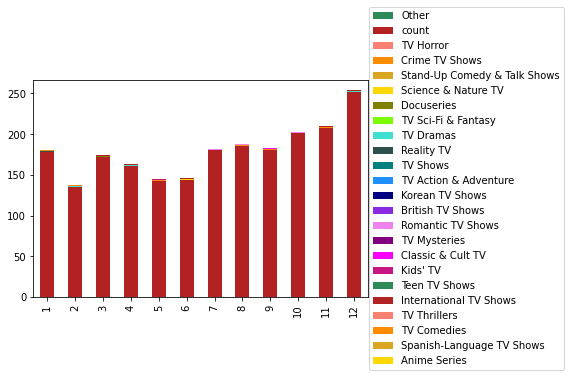

,1,2,3,4,5,6,7,8,9,10,11,12
Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
count,178.00,135.00,172.00,161.00,143.00,144.00,180.00,186.00,181.00,201.00,208.00,252.00
TV Horror,0.02,0.03,0.05,0.02,0.03,0.06,0.03,0.02,0.06,0.03,0.02,0.03
Crime TV Shows,0.16,0.24,0.26,0.19,0.21,0.23,0.13,0.20,0.22,0.12,0.19,0.15
Stand-Up Comedy & Talk Shows,0.01,0.01,0.02,0.03,0.05,0.01,0.02,0.02,0.02,0.02,0.01,0.02
Science & Nature TV,0.04,0.02,0.09,0.04,0.01,0.03,0.01,0.05,0.07,0.04,0.02,0.02
Docuseries,0.15,0.24,0.18,0.11,0.08,0.11,0.14,0.17,0.22,0.15,0.12,0.12
TV Sci-Fi & Fantasy,0.04,0.01,0.03,0.05,0.05,0.01,0.05,0.05,0.04,0.03,0.02,0.03
TV Dramas,0.25,0.29,0.34,0.24,0.30,0.34,0.33,0.31,0.33,0.22,0.28,0.30
Reality TV,0.08,0.05,0.05,0.07,0.03,0.10,0.13,0.11,0.08,0.08,0.12,0.10


In [ ]:

percent_month = {}
for month in list_of_months:
  try:
    temp_df = DATA_TV.loc[DATA_TV.date_added.dt.month.eq(month)]

    temp_len = len(temp_df)
    percent_month[month] = {}
    percent_month[month]['Other'] = 0
    percent_month[month]["count"] = temp_len
    try:
      for genre in list_of_genres:
        temp = temp_df.loc[temp_df[genre] == True]
        value = round((len(temp) / temp_len),2)
        if value >= .0010:
          percent_month[month][genre]= value
        else:
          percent_month[month]['Other'] += value
    except:
      print(genre, ': Not in month:', month) 
  except:
    print(month,': Not in Subset')
df = pd.DataFrame(percent_month)

df.transpose().plot(kind="bar", stacked=True, color = COLORS)
plt.legend(bbox_to_anchor=(1.6, .5), loc='right')
plt.show()
df

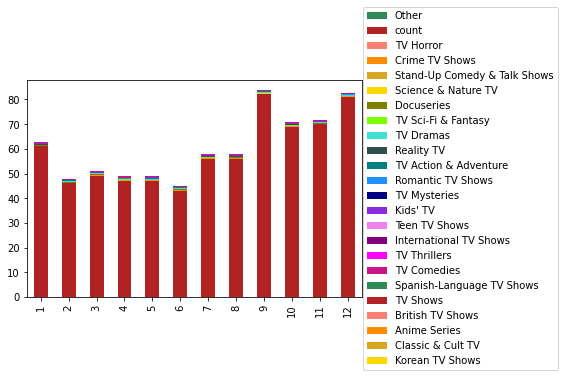

,1,2,3,4,5,6,7,8,9,10,11,12
Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
count,61.00,46.00,49.00,47.00,47.00,43.00,56.00,56.00,82.00,69.00,70.00,81.00
TV Horror,0.03,0.02,0.06,0.04,NaN,0.07,0.04,0.04,0.04,0.07,0.03,0.06
Crime TV Shows,0.13,0.28,0.20,0.11,0.19,0.26,0.12,0.14,0.18,0.06,0.11,0.11
Stand-Up Comedy & Talk Shows,0.03,0.02,0.04,0.04,0.13,0.02,0.05,0.04,0.04,0.07,0.01,0.06
Science & Nature TV,0.07,0.02,0.12,0.09,NaN,0.05,0.02,0.07,0.15,0.03,0.03,0.01
Docuseries,0.23,0.35,0.33,0.21,0.13,0.21,0.23,0.20,0.33,0.17,0.24,0.15
TV Sci-Fi & Fantasy,0.07,0.02,0.08,0.09,0.11,0.05,0.09,0.05,0.05,0.07,0.01,0.06
TV Dramas,0.15,0.28,0.27,0.17,0.40,0.40,0.25,0.29,0.23,0.28,0.23,0.25
Reality TV,0.15,0.09,0.04,0.13,0.02,0.21,0.14,0.16,0.13,0.12,0.26,0.22


In [ ]:

percent_month = {}
for month in list_of_months:
  try:
    temp_df = DATA_TV_US.loc[DATA_TV_US.date_added.dt.month.eq(month)]

    temp_len = len(temp_df)
    percent_month[month] = {}
    percent_month[month]['Other'] = 0
    percent_month[month]["count"] = temp_len
    try:
      for genre in list_of_genres:
        temp = temp_df.loc[temp_df[genre] == True]
        value = round((len(temp) / temp_len),2)
        if value >= .0010:
          percent_month[month][genre]= value
        else:
          percent_month[month]['Other'] += value
    except:
      print(genre, ': Not in month:', month) 
  except:
    print(month,': Not in Subset')
df = pd.DataFrame(percent_month)

df.transpose().plot(kind="bar", stacked=True, color = COLORS)
plt.legend(bbox_to_anchor=(1.6, .5), loc='right')
plt.show()
df

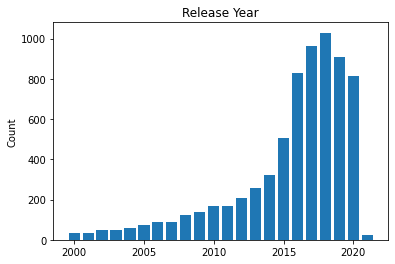

In [ ]:
release_years =list(data.release_year)
counts = dict()
for i in release_years:
  if i <2000:
    continue
  counts[i] = counts.get(i, 0) + 1
df = pd.DataFrame.from_dict(counts, orient='index')
df = df.sort_index()
#df.transpose().plot(kind="hist", stacked=False, color = COLORS)
myList = counts.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.bar(x, y)
plt.title('Release Year')
plt.ylabel('Count')
plt.show()

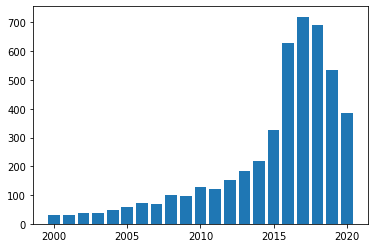

In [ ]:
release_years =list(DATA_MOVIE.release_year)
counts = dict()
for i in release_years:
  if i <2000:
    continue
  counts[i] = counts.get(i, 0) + 1
df = pd.DataFrame.from_dict(counts, orient='index')
df = df.sort_index()
#df.transpose().plot(kind="hist", stacked=False, color = COLORS)
myList = counts.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.bar(x, y)
plt.show()

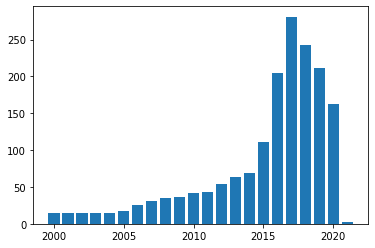

In [ ]:
release_years =list(DATA_MOVIE_US.release_year)
counts = dict()
for i in release_years:
  if i <2000:
    continue
  counts[i] = counts.get(i, 0) + 1
df = pd.DataFrame.from_dict(counts, orient='index')
df = df.sort_index()
#df.transpose().plot(kind="hist", stacked=False, color = COLORS)
myList = counts.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.bar(x, y)
plt.show()

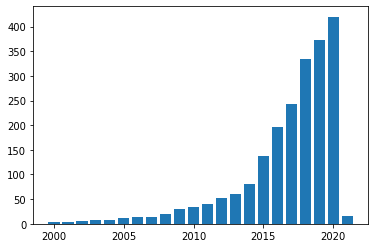

In [ ]:
release_years =list(DATA_TV.release_year)
counts = dict()
for i in release_years:
  if i <2000:
    continue
  counts[i] = counts.get(i, 0) + 1

myList = counts.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.bar(x, y)
plt.show()

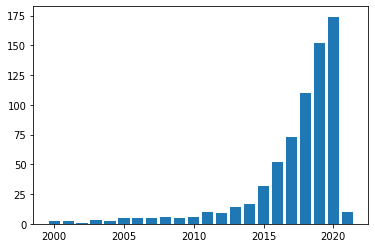

In [ ]:
release_years =list(DATA_TV_US.release_year)
counts = dict()
for i in release_years:
  if i <2000:
    continue
  counts[i] = counts.get(i, 0) + 1

myList = counts.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.bar(x, y)
plt.show()

In [ ]:

print(data['imdb_rating'].describe())
print(' ')
data['dif_yearAdded_yearReleased'].describe()

count    4837.000000
mean        6.513045
std         1.211163
min         1.500000
25%         5.800000
50%         6.600000
75%         7.400000
max         9.700000
Name: imdb_rating, dtype: float64
 


count    7372.000000
mean        4.750407
std         8.870362
min        -3.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        75.000000
Name: dif_yearAdded_yearReleased, dtype: float64

In [ ]:

print(DATA_TV['imdb_rating'].describe())
print(' ')
DATA_TV['dif_yearAdded_yearReleased'].describe()



count    1338.000000
mean        7.097160
std         1.122047
min         2.300000
25%         6.500000
50%         7.300000
75%         7.900000
max         9.500000
Name: imdb_rating, dtype: float64
 


count    2141.000000
mean        2.331154
std         5.117051
min        -3.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        71.000000
Name: dif_yearAdded_yearReleased, dtype: float64

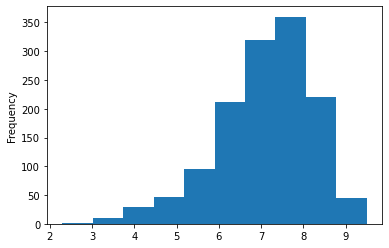

In [ ]:
DATA_TV['imdb_rating'].plot(kind = 'hist')

In [ ]:

print(DATA_TV_US['imdb_rating'].describe())
print(' ')
DATA_TV_US['dif_yearAdded_yearReleased'].describe()

count    525.000000
mean       7.128952
std        1.100382
min        3.200000
25%        6.600000
50%        7.300000
75%        7.900000
max        9.400000
Name: imdb_rating, dtype: float64
 


count    707.000000
mean       2.107496
std        6.037868
min       -2.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       71.000000
Name: dif_yearAdded_yearReleased, dtype: float64

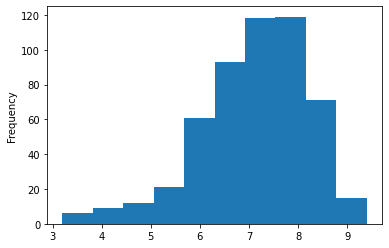

In [ ]:

DATA_TV_US['imdb_rating'].plot(kind = 'hist')

In [ ]:
print(DATA_MOVIE['imdb_rating'].describe())
print(' ')
DATA_MOVIE['dif_yearAdded_yearReleased'].describe()

count    3363.000000
mean        6.278115
std         1.166385
min         1.500000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.700000
Name: imdb_rating, dtype: float64
 


count    5047.000000
mean        5.645928
std         9.772889
min        -1.000000
25%         0.000000
50%         2.000000
75%         7.000000
max        75.000000
Name: dif_yearAdded_yearReleased, dtype: float64

In [ ]:

print(DATA_MOVIE_US['imdb_rating'].describe())
print(' ')
DATA_MOVIE_US['dif_yearAdded_yearReleased'].describe()


count    1467.000000
mean        6.286026
std         1.112659
min         1.600000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.000000
Name: imdb_rating, dtype: float64
 


count    1895.00000
mean        6.22058
std        11.19171
min         0.00000
25%         0.00000
50%         1.00000
75%         8.00000
max        75.00000
Name: dif_yearAdded_yearReleased, dtype: float64

Genre breakdown movies:

{'Children & Family Movies': 0.0989399293286219, 'Independent Movies': 0.12516273014692209, 'International Movies': 0.4532267063418263, 'TV Horror': 0.0, 'Crime TV Shows': 0.0, 'Dramas': 0.39166821647758976, 'Stand-Up Comedy & Talk Shows': 0.0, 'Stand-Up Comedy': 0.06118653524270039, 'Science & Nature TV': 0.0, 'Thrillers': 0.09131485958713037, 'Horror Movies': 0.05802492095964292, 'Docuseries': 0.0, 'TV Sci-Fi & Fantasy': 0.0, 'Music & Musicals': 0.0596987167565557, 'Sports Movies': 0.036451552910544915, 'TV Dramas': 0.0, 'Action & Adventure': 0.1340896410637902, 'Classic Movies': 0.019155663009112887, 'Anime Features': 0.01060070671378092, 'Romantic Movies': 0.09875395201785382, 'Reality TV': 0.0, 'Cult Movies': 0.010972661335317092, 'TV Shows': 0.0, 'TV Action & Adventure': 0.0, 'Korean TV Shows': 0.0, 'Sci-Fi & Fantasy': 0.04054305374744281, 'British TV Shows': 0.0, 'Comedies': 0.27357262413985495, 'Faith & Spirituality': 0.01060070671378092, 'Romantic TV Shows': 0.0, 'LGBTQ Movies': 0.016737957969127765, 'TV Mysteries': 0.0, 'Documentaries': 0.14617816626371583, 'Classic & Cult TV': 0.0, "Kids' TV": 0.0, 'Teen TV Shows': 0.0, 'International TV Shows': 0.0, 'Movies': 0.010414729403012832, 'TV Thrillers': 0.0, 'TV Comedies': 0.0, 'Spanish-Language TV Shows': 0.0, 'Anime Series': 0.0}


Genre breakdown TV:

{'Children & Family Movies': 0.0, 'Independent Movies': 0.0, 'International Movies': 0.0, 'TV Horror': 0.02863070539419087, 'Crime TV Shows': 0.17717842323651453, 'Dramas': 0.0, 'Stand-Up Comedy & Talk Shows': 0.021576763485477178, 'Stand-Up Comedy': 0.0, 'Science & Nature TV': 0.035269709543568464, 'Thrillers': 0.0, 'Horror Movies': 0.0, 'Docuseries': 0.14647302904564316, 'TV Sci-Fi & Fantasy': 0.03153526970954357, 'Music & Musicals': 0.0, 'Sports Movies': 0.0, 'TV Dramas': 0.2921161825726141, 'Action & Adventure': 0.0, 'Classic Movies': 0.0, 'Anime Features': 0.0, 'Romantic Movies': 0.0, 'Reality TV': 0.09211618257261411, 'Cult Movies': 0.0, 'TV Shows': 0.004979253112033195, 'TV Action & Adventure': 0.06224066390041494, 'Korean TV Shows': 0.06224066390041494, 'Sci-Fi & Fantasy': 0.0, 'British TV Shows': 0.09626556016597511, 'Comedies': 0.0, 'Faith & Spirituality': 0.0, 'Romantic TV Shows': 0.13817427385892117, 'LGBTQ Movies': 0.0, 'TV Mysteries': 0.03734439834024896, 'Documentaries': 0.0, 'Classic & Cult TV': 0.011203319502074689, "Kids' TV": 0.17178423236514523, 'Teen TV Shows': 0.024896265560165973, 'International TV Shows': 0.4975103734439834, 'Movies': 0.0, 'TV Thrillers': 0.02074688796680498, 'TV Comedies': 0.21784232365145229, 'Spanish-Language TV Shows': 0.06099585062240664, 'Anime Series': 0.061410788381742736}


Genre breakdown Total:

{'Children & Family Movies': 0.06831899319378451, 'Independent Movies': 0.08642609477334018, 'International Movies': 0.3129574932579941, 'TV Horror': 0.008860922049569796, 'Crime TV Shows': 0.05483498137922178, 'Dramas': 0.2704507512520868, 'Stand-Up Comedy & Talk Shows': 0.00667779632721202, 'Stand-Up Comedy': 0.0422499036856299, 'Science & Nature TV': 0.010915628611788878, 'Thrillers': 0.06305380762809812, 'Horror Movies': 0.04006677796327212, 'Docuseries': 0.04533196352895852, 'TV Sci-Fi & Fantasy': 0.009759856170540645, 'Music & Musicals': 0.04122255040452035, 'Sports Movies': 0.025170155387183767, 'TV Dramas': 0.09040708873763965, 'Action & Adventure': 0.09259021445999743, 'Classic Movies': 0.013227173494285347, 'Anime Features': 0.007319892127905484, 'Romantic Movies': 0.06819057403364583, 'Reality TV': 0.028509053550789778, 'Cult Movies': 0.007576730448182869, 'TV Shows': 0.0015410299216643123, 'TV Action & Adventure': 0.019262874020803903, 'Korean TV Shows': 0.019262874020803903, 'Sci-Fi & Fantasy': 0.027995376910235008, 'British TV Shows': 0.029793245152176705, 'Comedies': 0.18890458456401696, 'Faith & Spirituality': 0.007319892127905484, 'Romantic TV Shows': 0.042763580326184665, 'LGBTQ Movies': 0.011557724412482342, 'TV Mysteries': 0.011557724412482342, 'Documentaries': 0.10093745986901245, 'Classic & Cult TV': 0.0034673173237447026, "Kids' TV": 0.05316553229741877, 'Teen TV Shows': 0.007705149608321561, 'International TV Shows': 0.15397457300629253, 'Movies': 0.007191472967766791, 'TV Thrillers': 0.006420958006934634, 'TV Comedies': 0.06742005907281366, 'Spanish-Language TV Shows': 0.018877616540387825, 'Anime Series': 0.01900603570052652}

